In [38]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import sys
sys.path.append('../src')

%load_ext autoreload
%autoreload 2


import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'
import easyocr
import keras_ocr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
img_df = pd.read_csv('../data/processed/subset_data.csv')
img_df.head()

,chart_type,source,data_series,path,name
0,line,generated,"[{'x': '0', 'y': 25.132480533926586}, {'x': '1...",../data/raw/train/images/6274f182ba84.jpg,6274f182ba84
1,line,generated,"[{'x': '1990', 'y': 1594.7404572662153}, {'x':...",../data/raw/train/images/ebed9672f05e.jpg,ebed9672f05e
2,line,generated,"[{'x': 'Jan', 'y': 19.252781561026715}, {'x': ...",../data/raw/train/images/1df6f427d037.jpg,1df6f427d037
3,line,generated,"[{'x': 'Jan', 'y': 13.177213920369073}, {'x': ...",../data/raw/train/images/6b7f05a54ba9.jpg,6b7f05a54ba9
4,line,generated,"[{'x': 'Fiji', 'y': 31.651786659948677}, {'x':...",../data/raw/train/images/0e22a3b55726.jpg,0e22a3b55726


# 1. Scatterplot Sample

In [40]:
# Sample scatterplot
scatter = img_df.query('chart_type == "scatter"').sample(random_state=1)['path'].values[0]

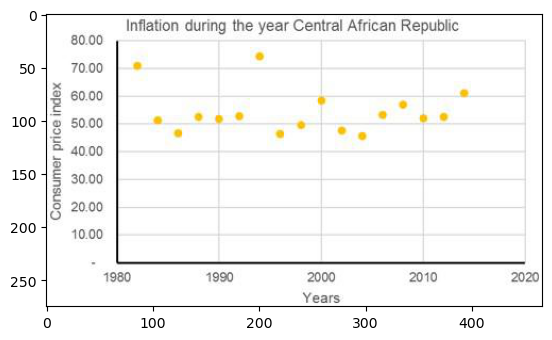

In [41]:
# scatterplot sample
plt.imshow(plt.imread(scatter))
plt.show()

# 2. Extracting Axes

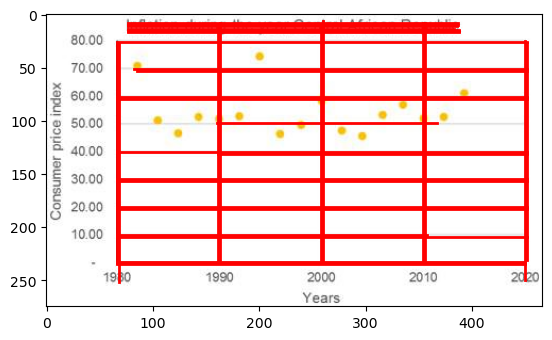

In [42]:
from extract_data.scatterplots import get_lines

liens = get_lines(scatter)

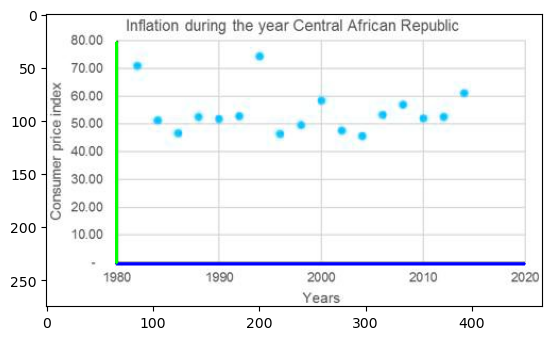

In [43]:
from extract_data.scatterplots import get_axes

x_axis, y_axis = get_axes(scatter, show_plot=True)



# 3. Extracting Scatterplot Points

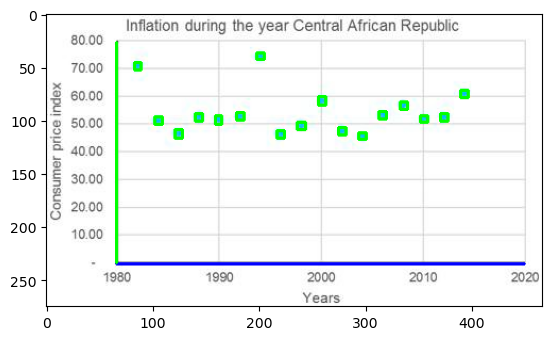

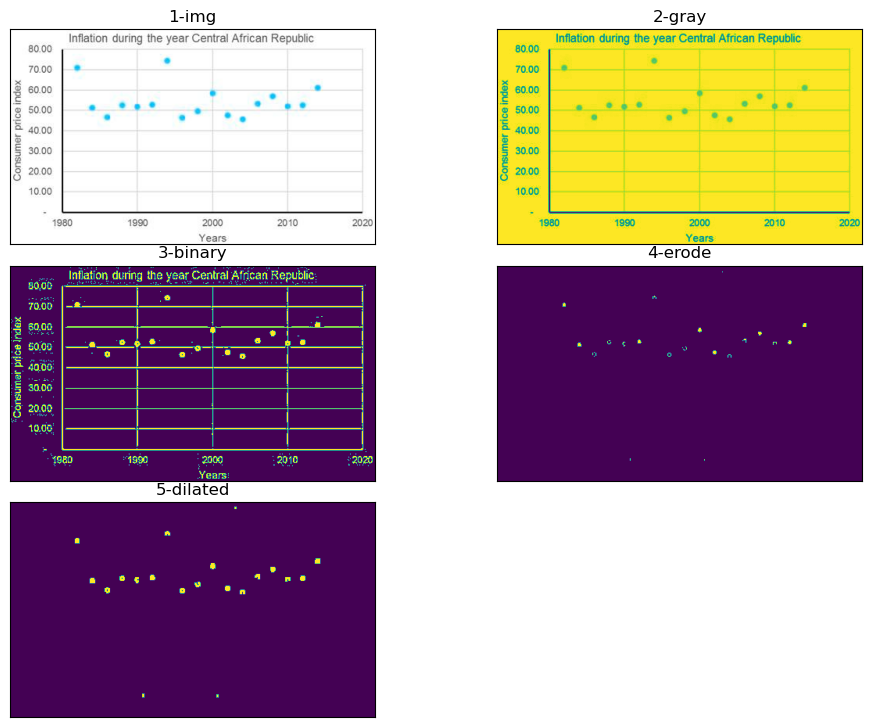

In [44]:
from extract_data.scatterplots import get_points

points = get_points(scatter, x_axis, y_axis, show_plot=True, show_transformations=True)

# 4. Rescaling the points to match the scale of the scatterplot axes

In [45]:
from extract_data.scatterplots import rescale_points

scaled_points = rescale_points(points, x_axis, y_axis, 1980, 2020, 0, 80)
scaled_points

[(2003, 47, 2004, 44),
 (1995, 47, 1996, 45),
 (1985, 48, 1986, 45),
 (2001, 49, 2002, 46),
 (1997, 51, 1998, 48),
 (1983, 52, 1984, 50),
 (2009, 53, 2010, 51),
 (1989, 53, 1990, 50),
 (2011, 54, 2012, 51),
 (1987, 54, 1988, 51),
 (1991, 54, 1992, 51),
 (2005, 54, 2006, 52),
 (2007, 58, 2008, 55),
 (1999, 60, 2000, 57),
 (2013, 62, 2014, 59),
 (1981, 72, 1982, 69),
 (1993, 76, 1994, 73)]

# 5. Comparing Predicted Coordinates to Actual Coordinates

In [46]:
from extract_data.scatterplots import predict_points
from extract_data.scatterplots import clean_data_series
from extract_data.scatterplots import compare_pred_actual

scatter_index = img_df.query('chart_type == "scatter"').sample(random_state=1).index[0]

actual = clean_data_series(scatter_index)
pred = predict_points(scaled_points)
pred_actual = compare_pred_actual(pred,actual)
pred_actual

,x_pred,y_pred,x_actual,y_actual
0,1981.5,70.5,1981.995842,70.783939
1,1983.5,51.0,1983.970894,51.153601
2,1985.5,46.5,1985.980596,46.692161
3,1987.5,52.5,1987.955648,52.683238
4,1989.5,51.5,1989.965350,51.790950
5,1991.5,52.5,1991.940402,52.810707
6,1993.5,74.5,1993.915454,74.225621
7,1995.5,46.0,1995.925156,46.309751
8,1997.5,49.5,1998.004158,49.496495
9,1999.5,58.5,1999.979210,58.546845


# 6. Trying other Scatterplot Samples

In [47]:
scatter_samples = img_df.query('chart_type == "scatter"').head(10)
scatter_samples

,chart_type,source,data_series,path,name
14570,scatter,generated,"[{'x': 0.9773619580653242, 'y': 78.79986811737...",../data/raw/train/images/1738e31c7f3f.jpg,1738e31c7f3f
14571,scatter,generated,"[{'x': 1.0341113105924589, 'y': 6.528035647976...",../data/raw/train/images/0f04deb1d36c.jpg,0f04deb1d36c
14572,scatter,generated,"[{'x': 1990.0441583549366, 'y': 344.8726439123...",../data/raw/train/images/7609f2a59041.jpg,7609f2a59041
14573,scatter,generated,"[{'x': 1974.8483623129803, 'y': 17552.88388373...",../data/raw/train/images/85538063e5a7.jpg,85538063e5a7
14574,scatter,generated,"[{'x': 1.046979865771812, 'y': 98.658703897990...",../data/raw/train/images/4f4603a737bb.jpg,4f4603a737bb
14575,scatter,generated,"[{'x': 1949.8385093167701, 'y': 93.48479127333...",../data/raw/train/images/1b8ada3a4583.jpg,1b8ada3a4583
14576,scatter,generated,"[{'x': 1990.0, 'y': 165.6921862667719}, {'x': ...",../data/raw/train/images/9e778d350405.jpg,9e778d350405
14577,scatter,generated,"[{'x': 1995.0604737107342, 'y': 27.94599807135...",../data/raw/train/images/9ec58b751875.jpg,9ec58b751875
14578,scatter,generated,"[{'x': 1949.9506416584402, 'y': 99.33593597501...",../data/raw/train/images/f4cba936717a.jpg,f4cba936717a
14579,scatter,generated,"[{'x': 1950.250569476082, 'y': 49.305135951661...",../data/raw/train/images/0745dfeb49e4.jpg,0745dfeb49e4


## Sample 1

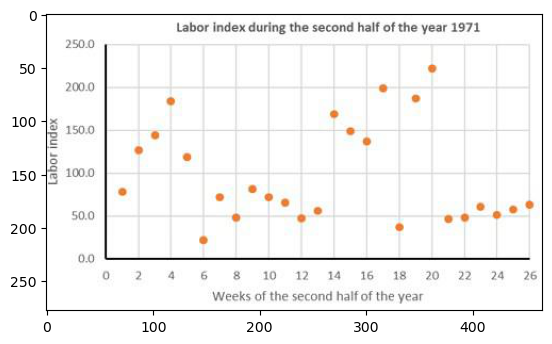

In [48]:
scatter1 = scatter_samples['path'].values[0]
index1 = scatter_samples['data_series'].index[0]

plt.imshow(plt.imread(scatter1))
plt.show()

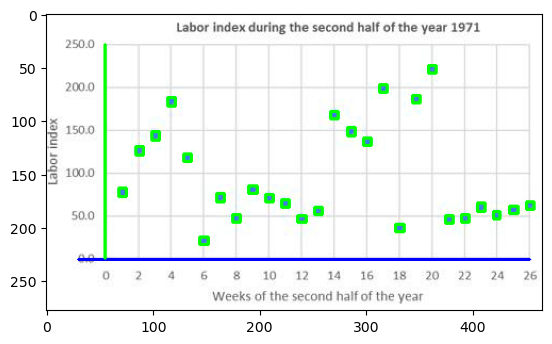

In [49]:
x_axis, y_axis = get_axes(scatter1, show_plot=False)
points = get_points(scatter1, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 0, 26, 0, 250)
pred = predict_points(scaled_points)
actual = clean_data_series(index1)
pred_actual = compare_pred_actual(pred, actual)

## Sample 2

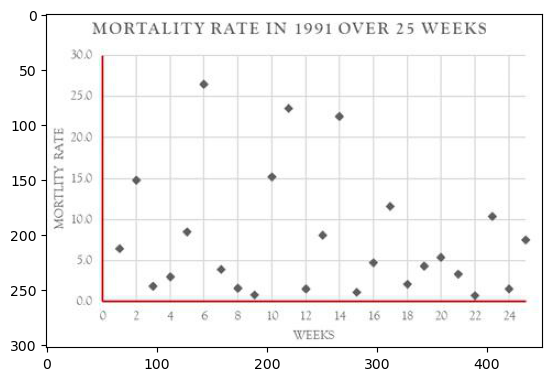

In [50]:
scatter2 = scatter_samples['path'].values[1]
index2 = scatter_samples['data_series'].index[1]

plt.imshow(plt.imread(scatter2))
plt.show()

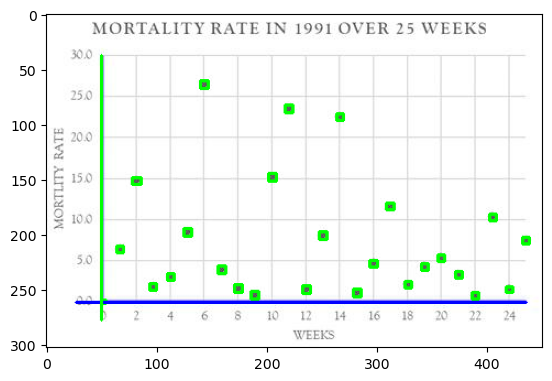

In [51]:
x_axis, y_axis = get_axes(scatter2, show_plot=True)
points = get_points(scatter2, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 0, 26, 0, 30)
pred = predict_points(scaled_points)
actual = clean_data_series(index2)
pred_actual = compare_pred_actual(pred, actual)

## Sample 3

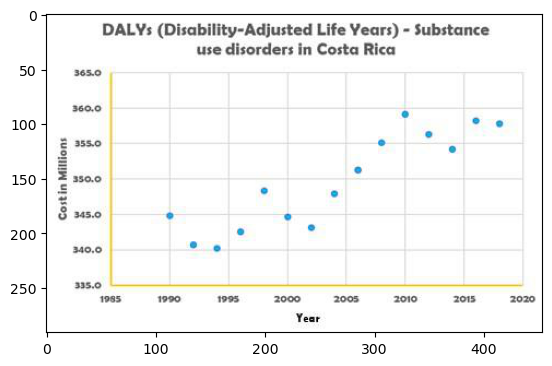

In [52]:
scatter3 = scatter_samples['path'].values[2]
index3 = scatter_samples['data_series'].index[2]

plt.imshow(plt.imread(scatter3))
plt.show()

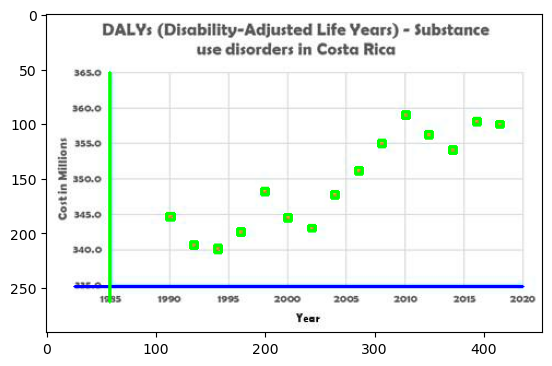

In [53]:
x_axis, y_axis = get_axes(scatter3, show_plot=True)
points = get_points(scatter3, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1985, 2020, 335, 365)
pred = predict_points(scaled_points)
actual = clean_data_series(index3)
pred_actual = compare_pred_actual(pred, actual)

## Sample 4

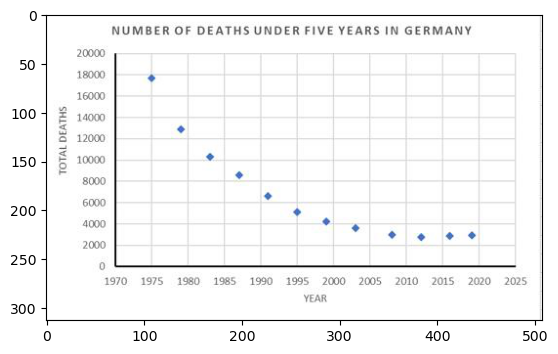

In [54]:
scatter4 = scatter_samples['path'].values[3]
index4 = scatter_samples['data_series'].index[3]

plt.imshow(plt.imread(scatter4))
plt.show()

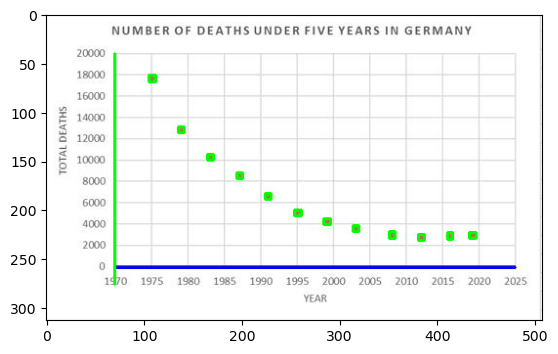

In [55]:
x_axis, y_axis = get_axes(scatter4, show_plot=True)
points = get_points(scatter4, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1970, 2025, 0, 200000)
pred = predict_points(scaled_points)
actual = clean_data_series(index4)
pred_actual = compare_pred_actual(pred, actual)

# Sample 5

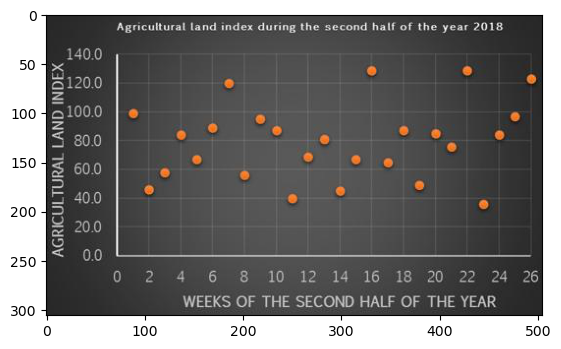

In [56]:
scatter5 = scatter_samples['path'].values[4]
index5 = scatter_samples['data_series'].index[4]

plt.imshow(plt.imread(scatter5))
plt.show()

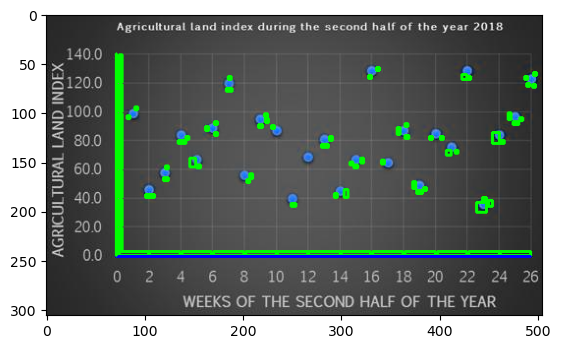

In [57]:
x_axis, y_axis = get_axes(scatter5, show_plot=True)
points = get_points(scatter5, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 0, 26, 0, 140)
pred = predict_points(scaled_points)
actual = clean_data_series(index5)
pred_actual = compare_pred_actual(pred, actual)

## Sample 6

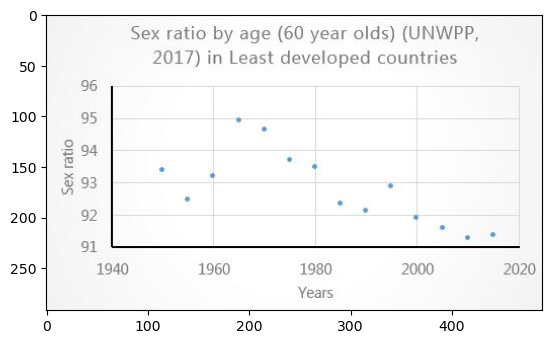

In [58]:
scatter6 = scatter_samples['path'].values[5]
index6 = scatter_samples['data_series'].index[5]

plt.imshow(plt.imread(scatter6))
plt.show()

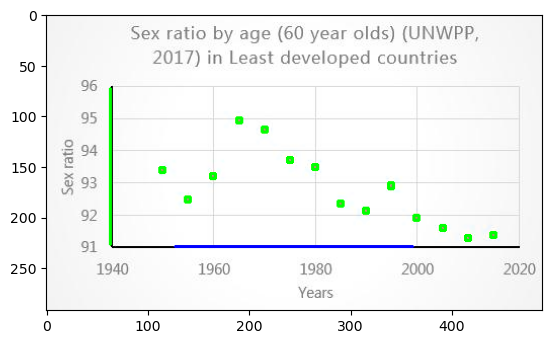

In [59]:
x_axis, y_axis = get_axes(scatter6, show_plot=True)
points = get_points(scatter6, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1940, 2020, 91, 96)
pred = predict_points(scaled_points)
actual = clean_data_series(index6)
pred_actual = compare_pred_actual(pred, actual)

## Sample 7

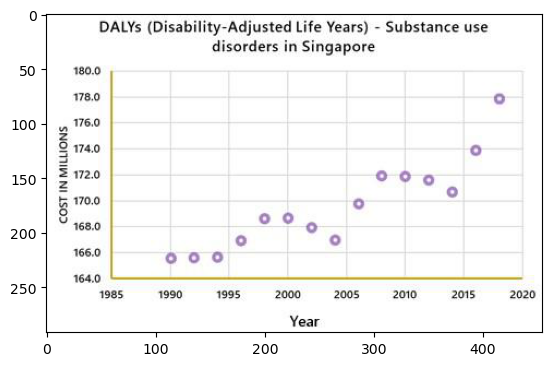

In [60]:
scatter7 = scatter_samples['path'].values[6]
index7 = scatter_samples['data_series'].index[6]

plt.imshow(plt.imread(scatter7))
plt.show()

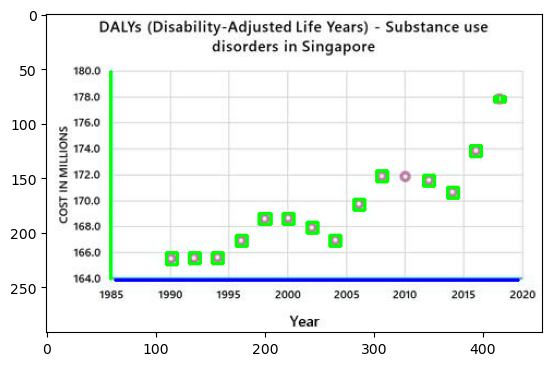

In [61]:
x_axis, y_axis = get_axes(scatter7, show_plot=True)
points = get_points(scatter7, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1985, 2020, 164, 180)
pred = predict_points(scaled_points)
actual = clean_data_series(index7)
pred_actual = compare_pred_actual(pred, actual)

## Sample 8

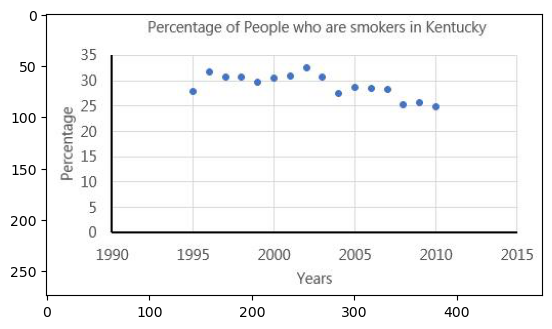

In [62]:
scatter8 = scatter_samples['path'].values[7]
index8 = scatter_samples['data_series'].index[7]

plt.imshow(plt.imread(scatter8))
plt.show()

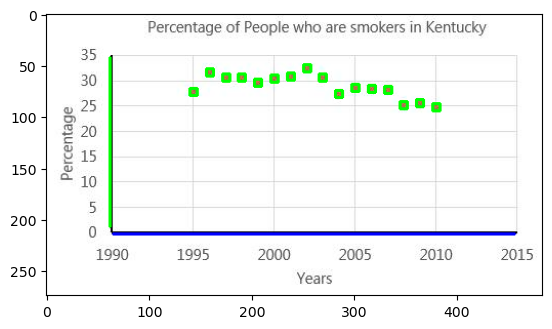

In [63]:
x_axis, y_axis = get_axes(scatter8, show_plot=True)
points = get_points(scatter8, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1990, 2015, 0, 35)
pred = predict_points(scaled_points)
actual = clean_data_series(index8)
pred_actual = compare_pred_actual(pred, actual)

## Sample 9

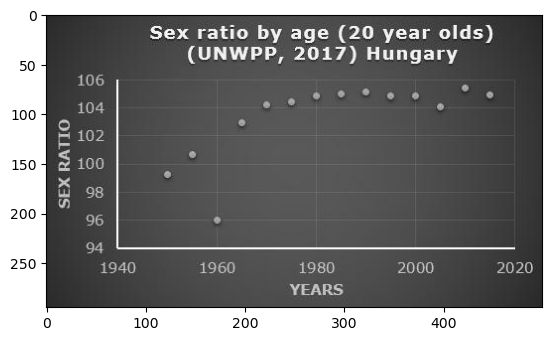

In [64]:
scatter9 = scatter_samples['path'].values[8]
index9 = scatter_samples['data_series'].index[8]

plt.imshow(plt.imread(scatter9))
plt.show()

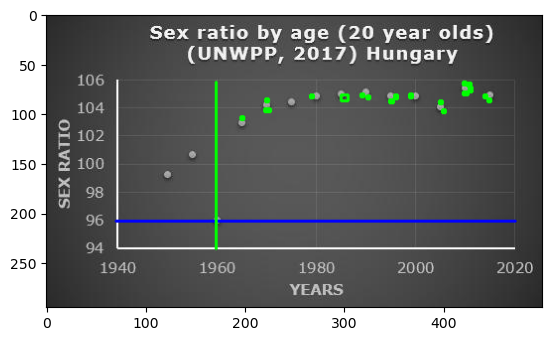

In [65]:
x_axis, y_axis = get_axes(scatter9, show_plot=True)
points = get_points(scatter9, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1940, 2020, 94, 106)
pred = predict_points(scaled_points)
actual = clean_data_series(index9)
pred_actual = compare_pred_actual(pred, actual)

## Sample 10

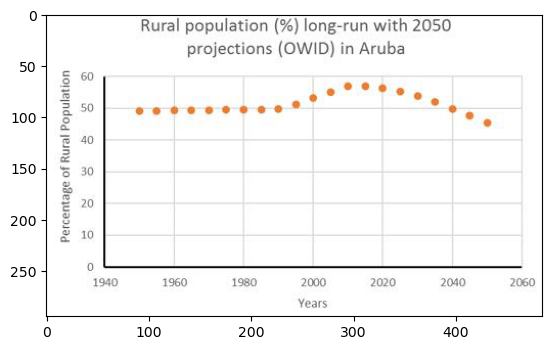

In [66]:
scatter10 = scatter_samples['path'].values[9]
index10 = scatter_samples['data_series'].index[9]

plt.imshow(plt.imread(scatter10))
plt.show()

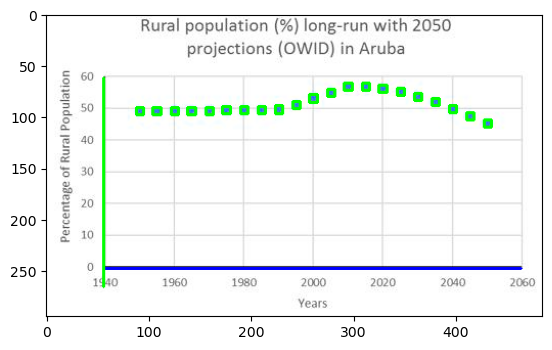

In [67]:
x_axis, y_axis = get_axes(scatter10, show_plot=True)
points = get_points(scatter10, x_axis, y_axis)
scaled_points = rescale_points(points, x_axis, y_axis, 1940, 2060, 0, 60)
pred = predict_points(scaled_points)
actual = clean_data_series(index10)
pred_actual = compare_pred_actual(pred, actual)